<a href="https://colab.research.google.com/github/Shrouk-Adel/Twitter_Sentiment_Analysis_BERT-/blob/main/Sentiment_Analysis_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# checking for the cpu running or not
!nvidia-smi

Sat Dec  7 17:04:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
pip install torch

In [35]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Example of a word frequency plot
from collections import Counter


### Load dataset

In [12]:
df=pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Data Processing

In [14]:
import spacy # SpaCy is a popular Python library for advanced NLP tasks such as tokenization, named entity recognition (NER)
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))



def process_text (text):
  text = text.lower()   # convert text to lowercase

  text = text.translate(str.maketrans('','',string.punctuation))  # remove punctuation


  # tokenize and lemmitize
  doc =nlp(text)
  tokens = [token.lemma_ for token in doc]

  # remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  return ' '.join(tokens)


df['cleaned_text'] =df['text'].apply(process_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


### Exploratory Data Analysis (EDA)

In [20]:
all_words =''.join([text for text in df['cleaned_text']]).split()
all_words

['virginamerica',
 'dhepburn',
 'sayvirginamerica',
 'plus',
 'add',
 'commercial',
 'experience',
 'tackyvirginamerica',
 'I',
 'today',
 'must',
 'mean',
 'I',
 'need',
 'take',
 'another',
 'tripvirginamerica',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recoursevirginamerica',
 'really',
 'big',
 'bad',
 'thingvirginamerica',
 'seriously',
 'would',
 'pay',
 '30',
 'flight',
 'seat',
 'playing',
 'really',
 'bad',
 'thing',
 'fly',
 'vavirginamerica',
 'yes',
 'nearly',
 'every',
 'time',
 'I',
 'fly',
 'vx',
 '"',
 'ear',
 'worm',
 '"',
 'go',
 'awayvirginamerica',
 'really',
 'miss',
 'prime',
 'opportunity',
 'man',
 'without',
 'hat',
 'parody',
 'httpstcomwpg7grezpvirginamerica',
 'well',
 'I',
 'didnt',
 '…',
 'Ivirginamerica',
 'amazing',
 'arrive',
 'hour',
 'early',
 'good',
 'Ivirginamerica',
 'know',
 'suicide',
 'second',
 'lead',
 'cause',
 'death',
 'among',
 'teen',
 '1024virginamerica',
 'lt3',
 'pretty

In [21]:
count_words = Counter(all_words)
count_words.most_common(15)

[('I', 8038),
 ('flight', 4461),
 ('get', 2012),
 ('thank', 1130),
 ('cancel', 1044),
 ('hour', 1041),
 ('delay', 886),
 ('customer', 881),
 ('service', 851),
 ('time', 830),
 ('go', 728),
 ('call', 728),
 ('fly', 708),
 ('wait', 698),
 ('bag', 681)]

In [23]:
commn_words = count_words.most_common(20)
commn_words

[('I', 8038),
 ('flight', 4461),
 ('get', 2012),
 ('thank', 1130),
 ('cancel', 1044),
 ('hour', 1041),
 ('delay', 886),
 ('customer', 881),
 ('service', 851),
 ('time', 830),
 ('go', 728),
 ('call', 728),
 ('fly', 708),
 ('wait', 698),
 ('bag', 681),
 ('need', 674),
 ('hold', 673),
 ('make', 667),
 ('plane', 661),
 ('help', 648)]

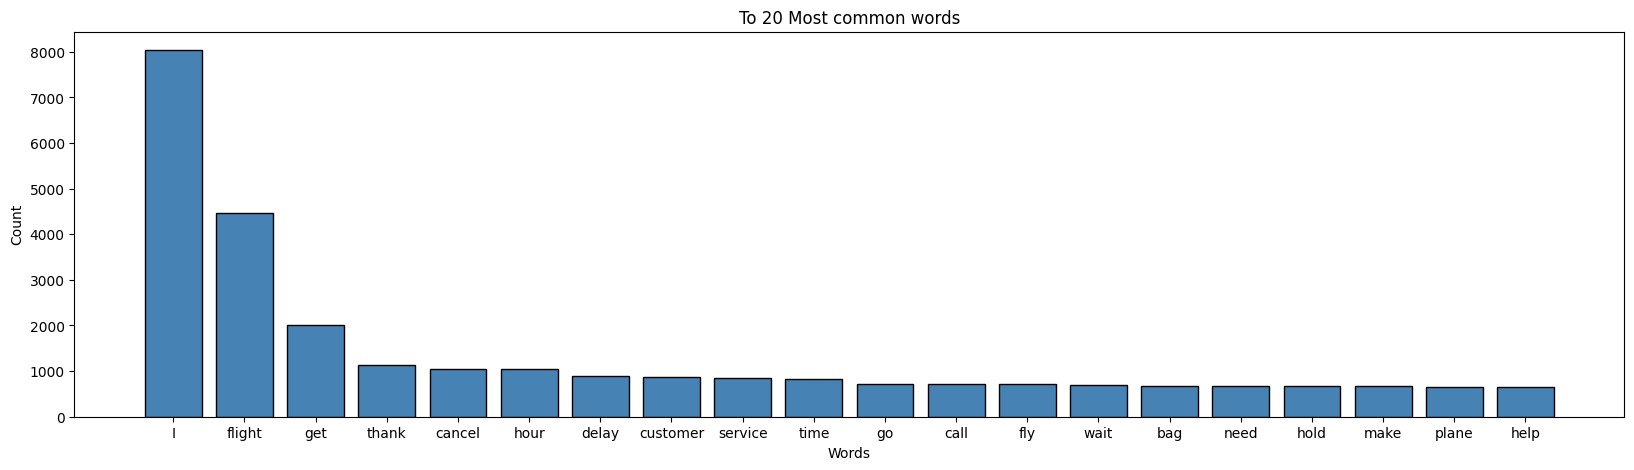

In [27]:
com_w = [word[0] for word in commn_words]
count_w =[word[1] for word in commn_words]

plt.figure(figsize=(20,5))
bars = plt.bar(com_w, count_w, color='steelblue', edgecolor='black')
plt.title('To 20 Most common words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

### Modeling
Pre-processing

We split the data into training, validation, and test sets (70:15:15) and fine-tuned the BERT model.


In [28]:
# label maping
label_map = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

df['label']=df['airline_sentiment'].map(label_map)


# output of BertTokenizer is :
`input_ids`
A list of integers representing the tokenized version of the input text, where each token (word or subword) is mapped to its corresponding ID in the model's vocabulary.

`attention_mask`
 A binary mask (list of 1s and 0s) indicating which tokens in input_ids should be attended to by the model.

 `token_type_ids`
 A sequence of 0s and 1s (or other segment IDs) indicating which tokens belong to which segment in tasks with multiple inputs, such as sentence pair classification.


In [29]:
from transformers import BertTokenizer

# tokanization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# tokenize data
def tokenize_text (text):
  return tokenizer(text, padding='max_length', truncation=True, max_length=128)

df['tokenized_text'] = df['cleaned_text'].apply(tokenize_text)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [31]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text,label,tokenized_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn say,1,"[input_ids, token_type_ids, attention_mask]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus add commercial experience t...,2,"[input_ids, token_type_ids, attention_mask]"
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica I today must mean I need take an...,1,"[input_ids, token_type_ids, attention_mask]"
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,0,"[input_ids, token_type_ids, attention_mask]"
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,0,"[input_ids, token_type_ids, attention_mask]"


In [32]:
df['tokenized_text'][0]

{'input_ids': [101, 6261, 14074, 14735, 28144, 13699, 8022, 2360, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

The SentimentDataset class in the code converts the data into a format appropriate for use with the Hugging Face Transformers library

In [34]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

### Splits the dataset
Train - Test - Validation

In [36]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['tokenized_text'].to_list(), df['label'].to_list(),test_size=0.3,random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels,test_size=0.5,random_state=42)

The `convert_to_dicts` function processes tokenized texts to create dictionaries containing lists of input_ids and attention_mask values. This format is necessary for further steps in model training and evaluation.

In [40]:
def convert_to_dicts (tokenize_text):
  input_ids =[d['input_ids'] for d in tokenize_text]
  attention_mask =[d['attention_mask'] for d in tokenize_text]

  return {'input_ids':input_ids, 'attention_mask':attention_mask}


# Convert to lists of dictionaries
train_encodings = convert_to_dicts(train_texts)
val_encodings = convert_to_dicts(val_texts)
test_encodings = convert_to_dicts(test_texts)

# Create three dataset objects using the SentimentDataset
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

### Load Model and Training Arguments

In [41]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Now let’s define training arguments using the `TrainingArguments` class from the Hugging Face Transformers library:

In [43]:
training_args = TrainingArguments(
    output_dir='./results', # All files generated during training will be stored here
    num_train_epochs=5, # The model will be trained for 3 full epochs unless the step limit (max_steps) is reached first
    per_device_train_batch_size=5, # Training batch size per device (GPU or CPU).
    per_device_eval_batch_size=5, # Evaluation batch size per device (GPU or CPU).
    warmup_steps=10, # Number of warm-up steps during which the learning rate gradually increases to its initial value
    weight_decay=0.01, # Weight decay rate: this technique helps to avoid overfitting, penalizing large weights in the neural network
    logging_dir='./logs', # Directory where training logs will be stored
    max_steps=10,  # Maximum number of training steps to be performed
    save_steps=2,  # Range of steps after which the model will be saved
    logging_steps=2,  # Range of steps after which log information will be recorded
)

In [44]:
trainer =Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Start training
trainer.train()

max_steps is given, it will override any value given in num_train_epochs
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
2,1.246700
4,1.043900
6,1.127700
8,0.967600
10,0.835100


TrainOutput(global_step=10, training_loss=1.044236183166504, metrics={'train_runtime': 614.8844, 'train_samples_per_second': 0.081, 'train_steps_per_second': 0.016, 'total_flos': 3288917721600.0, 'train_loss': 1.044236183166504, 'epoch': 0.004878048780487805})

### Evaluating the model

In [45]:
# Evaluate the Model
results = trainer.evaluate(test_dataset)

print("Evaluation Results:")
print(f"  - Loss: {results['eval_loss']:.4f}")
print(f"  - Runtime: {results['eval_runtime']:.2f} seconds")
print(f"  - Samples per Second: {results['eval_samples_per_second']:.2f}")
print(f"  - Steps per Second: {results['eval_steps_per_second']:.2f}")
print(f"  - Epoch: {results['epoch']:.4f}")

Evaluation Results:
  - Loss: 0.8789
  - Runtime: 19.29 seconds
  - Samples per Second: 113.84
  - Steps per Second: 22.81
  - Epoch: 0.0049


### Saving the model

In [46]:
# Save the model and tokenizer in the current folder
model_save_path = "./"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

### Make Predictions on New Data

In [49]:
def predict_sentiment(text):
    '''Function to predict the sentiment of a given text using a pre-trained BERT model.
    Args: the input text for sentiment prediction.
    Returns: the predicted sentiment ('negative', 'neutral', 'positive').
    '''
      # Move model to the device where input tensors will be created
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move the model to the correct device

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_class = torch.argmax(predictions, dim=1).item()
    sentiment = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment[predicted_class]

# Example prediction
example_text = "I hate flying with this airline!"
predicted_sentiment = predict_sentiment(example_text)
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: negative


### Conclusion
This project demonstrated the complete machine learning lifecycle for sentiment analysis, from data collection and preprocessing to model training and evaluation.

By leveraging the power of BERT and the Transformers library, we built a robust model capable of accurately classifying customer feedback sentiment into positive, negative, or neutral categories.